<a href="https://colab.research.google.com/github/Baldezo313/Some-real-world-machine-learning-project/blob/main/PROJET_10_CONSTRUCTION_D'UN_MODELE_DE_PREDICTION_DES_PUBLICITES_SUR_UN_SITE_WEB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET 10 : CONSTRUCTION D'UN MODELE DE PREDICTION DES PUBLICITES SUR UN SITE WEB   

Les entreprises, de tout domaine, font face à une concurrence accrue et mondiale. De plus,
Internet fait partie intégrale de notre vie quotidienne. Grâce à cet outil, on peut acheter en ligne,
se former, vendre des produits, contacter des personnes dans le monde entier, etc. Dans ce
contexte, il est absolument primordial pour une entreprise de développer sa présence sur le net.
Elle doit aussi faire en sorte que les utilisateurs aient une très bonne expérience sur ses
plateformes en ligne en général et sur son site web en particulier. Malheureusement, certains
sites web ne permettent pas aux utilisateurs d'avoir une bonne expérience de navigation. Cela
peut être dû à plusieurs facteurs comme :  
* Des problèmes de rendus de pages ;  
* Un mauvais graphisme qui ne donne pas envie de continuer sur le site ;  
* Des informations qui ne sont pas placées au bon endroit et sont donc difficiles d'accès ;  
* Un modèle de page trop complexe ;  
* Une monétisation excessive ;  
* Un contenu pauvre ;  
* Des publicités agressives et des Pop-ups trop fréquents et mal placés qui irritent ;  
* etc...  

Dans ce projet, nous allons nous focaliser sur l'un des facteurs favorisant la mauvaise expérience
des utilisateurs d'un site internet : les publicités agressives et les pop-ups trop fréquents et mal
placés. Nous allons appliquer des techniques de Machine Learning pour aider une entreprise à
identifier les publicités potentielles et les pop-ups, puis à les éliminer avant même qu'ils
n'apparaissent afin d'améliorer l'expérience des utilisateurs de son site web.  


**CONTEXTE ET OBJECTIFS DE L'ETUDE**  

Vous êtes Data Scientist dans une entreprise de commerce qui possède une boutique en ligne.
Le Directeur Marketing vous fait part des nombreuses plaintes reçues d'utilisateurs par rapport
à leur mauvaise expérience de navigation sur le site internet de la boutique due aux nombreuses
publicités et à des pop-ups trop fréquents et mal placés qui apparaissent pendant la navigation.
Lors de la réunion avec les différents collaborateurs intervenant sur le site, il a été décidé de créer un moteur sur le serveur Web qui identifie les publicités potentielles ainsi que les popups,
puis les élimine avant même qu'ils n'apparaissent. La création de ce moteur passe par la
construction d'un modèle qui prédit si quelque chose est une publicité ou non. Il s'agit donc
d'une tâche de classification binaire.  


En tant que Data Scientist de l'entreprise, vous êtes chargé de créer ce modèle. Pour ce faire,
vous disposez d'un ensemble de données38 qui contient un ensemble de publicités possibles sur
une variété de pages Web du site de la boutique. Cet ensemble de données a également été
étiqueté, chaque annonce possible ayant une étiquette indiquant s'il s'agit réellement d'une
publicité ou non

**LIBRAIRIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
# Importation et affichage des données
df = pd.read_csv('https://raw.githubusercontent.com/Baldezo313/Some-real-world-machine-learning-project/refs/heads/main/Machine-Learning-par-la-pratique-avec-Python-master/ad.data?token=GHSAT0AAAAAAC4VKTERS7LGGFFTPVVXXPFOZ4N6YEQ',
                 header=None)
print(df.info())
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None




<ipython-input-2-ee6b5e8199ff>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/Baldezo313/Some-real-world-machine-learning-project/refs/heads/main/Machine-Learning-par-la-pratique-avec-Python-master/ad.data?token=GHSAT0AAAAAAC4VKTERS7LGGFFTPVVXXPFOZ4N6YEQ',


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


La dataframe contient 3279 observations (lignes) et 1559 variables (colonnes). La dernière
colonne est notre variable cible et les autres les variables indépendantes.

In [3]:
# Variables indépendantes
X = df.loc[:, 0:1557]

# Variable dépendante
y = df[1558]

# Valeurs distinctes de la variable dépendante
y.unique()

array(['ad.', 'nonad.'], dtype=object)

La variable dépendante est une variable binaire qui indique s'il s'agit d'une publicité *(ad)* ou non *(nonad)*.

### NETTOYAGE DES DONNEES  



In [4]:
# Regardons un échantillon aléatoire de 10 lignes de X
X.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
2924,40,200,5.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,90,90,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
586,23,26,1.1304,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1787,11,64,5.8181,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2530,25,112,4.48,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1158,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1754,39,78,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,28,100,3.5714,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,24,236,9.8333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


On remarque la présence des symboles '?' indiquant certainement des valeurs manquantes. De plus, on dirait que ces '?' apparaissent uniquement au niveau des 3 premières colonnes.
Vérifions le type des données dans chaque variable.  

In [5]:
# Type des données de chaque variable
df.dtypes

,0
0,object
1,object
2,object
3,object
4,int64
...,...
1554,int64
1555,int64
1556,int64
1557,int64


C'est normal que les valeurs de la variable dépendante soient de type object mais les variables indépendantes devraient toutes êtres de type numérique *(float)*. Les variables indépendantes de
type object le sont à cause de la présence des symboles *'?'*. Pour être sûr de ne rien oublier, nous allons remplacer ces symboles par *NaN* au niveau de toutes les colonnes pour spécifier qu'elles sont des valeurs manquantes. Dans un premier temps, le remplacement sera effectué au niveau des 4 premières colonnes et dans un second temps au niveau du reste des colonnes.

In [6]:
# Remplacement des '?' par des NaN au niveau des 4 premières colonnes

for i in range(4):
  X[i] = X[i].str.replace('?', 'nan').values.astype(float)


# Remplacement des '?' par des NaN au niveau du reste des colonnes

for i in range(4, 1558):
  X[i] = X[i].replace('?', 'nan').values.astype('float')

# Affichage de X
X.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
1885,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
963,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1505,95.0,174.0,1.8315,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
852,12.0,86.0,7.1666,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1361,75.0,95.0,1.2666,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3251,16.0,16.0,1.0000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2802,46.0,100.0,2.1739,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
885,237.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Y a-t-il des valeurs manquantes dans la dataframe ?

In [8]:
# Nombre de valeurs manquantes par colonne
X.isna().sum().sort_values(ascending=False)

,0
3,1246
2,910
0,903
1,901
1556,0
...,...
517,0
516,0
515,0
514,0


Remplaçons maintenant les valeurs manquantes *(NaN)* au niveau de chaque variable par la moyenne de la variable

In [9]:
# Remplacement des valeurs manquantes

for i in range(1558):
  X[i] = X[i].fillna(X[i].mean(axis=0))   # Par defaut axis=0

# verification

X.isna().sum().sort_values(ascending=False)

,0
0,0
1023,0
1045,0
1044,0
1043,0
...,...
516,0
515,0
514,0
513,0


Il n’y a plus de valeurs manquantes au niveau des variables.

### PREPARATION DES DONNEES POUR LA MODELISATION  

**NORMALISATION**  



In [10]:
# Création d'un tableau numpy à partir de la dataframe X
X_array = X.values

# Normalisation des données
scaler = MinMaxScaler()
X_array_scaled = scaler.fit_transform(X_array)

X_array_scaled.shape

(3279, 1558)

**REDUCTION DE LA DIMENSIONNALITE**  

Le véritable défi que pose notre dataframe est sa très grande dimensionnalité. Nous allons donc appliquer l'ACP afin de réduire cette dimensionnalité avant de passer les données dans un
algorithme de classification binaire.

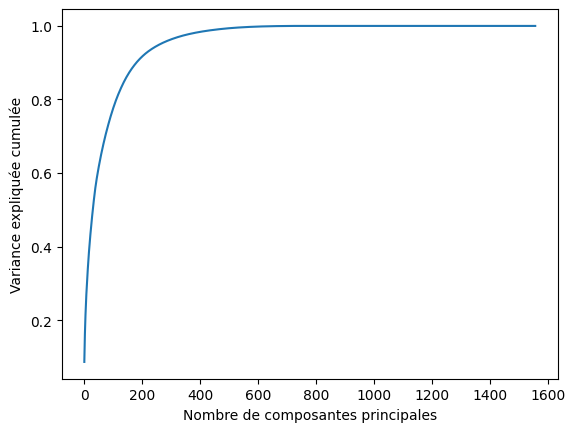

In [11]:
# Création d'une instance de la classe PCA
model_pca = PCA()

# Application aux données
model_pca.fit(X_array_scaled)

# Visualisation du pourcentage cumulé de variance expliquée
plt.plot(np.cumsum(model_pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.show()

Selon le graphique ci-dessus, les 300 premières composantes principales expliquent pratiquement la totalité de la variance des données. Les 200 premières composantes principales
expliquent 80% de la variance totale des données. Nous décidons donc de réduire la dimension de notre ensemble de données en prenant 250 comme nombre de composantes principales.

In [12]:
# PCA avec 250 composantes principales
pca = PCA(n_components=250)

# Transformation des données
X_array_reducted = pca.fit_transform(X_array_scaled)

# Dimension du nouveau jeu de données
X_array_reducted.shape

(3279, 250)

**DIVISION DES DONNEES EN DONNEES D'ENTRAINEMENT ET DE D'EVALUATION DU MODELE**  



In [13]:
# Données d'entraînement et d'évaluation du modèle
seed = 1111
test_size = 0.3
y_array = y.values

X_train, X_test, y_train, y_test = train_test_split(X_array_reducted,
                                                    y_array, stratify = y_array,
                                                    test_size = test_size,
                                                    random_state = seed)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2295, 250)
(2295,)
(984, 250)
(984,)


### MODELISATION PAR REGRESSION LOGISTIQUE  
Passons maintenant à l'étape tant attendue de la création d'un modèle qui prédit si quelque chose est une publicité ou non.

In [14]:
# Création d'une instance de la classe LogisticRegression()
lr = LogisticRegression(random_state=seed)

# Entraînement du modèle
lr.fit(X_train, y_train)

#Score du modèle
print("Score sur les données d'entraînement :", round(lr.score(X_train, y_train), 2))
print("Score sur les données d'évaluation :", round(lr.score(X_test, y_test), 2))

Score sur les données d'entraînement : 0.98
Score sur les données d'évaluation : 0.97


Le modèle donne une précision globale de 98% sur les données d'entraînement et semble bien se généraliser (pas de phénomène de surapprentissage) avec un score de 97% sur les données
de test. Passons maintenant aux prédictions.

In [15]:
# Prédictions
yhat = lr.predict(X_test)

# Rapport de classification
print(classification_report(yhat, y_test))

              precision    recall  f1-score   support

         ad.       0.79      0.96      0.87       113
      nonad.       1.00      0.97      0.98       871

    accuracy                           0.97       984
   macro avg       0.89      0.97      0.92       984
weighted avg       0.97      0.97      0.97       984



Selon ce rapport de performance globale du modèle, 97% (accuracy) des observations des données d'évaluation ont été correctement classées. 96% des publicités (classe ad) ont été
correctement classés comme tel (paramètre recall) ce qui veut dire que seulement 4% des publicités ont été mal classés comme étant des non-publicités : c'est un risque de mauvaise
expérience de navigation dû aux publicités de l'ordre de 3%.  

Par ailleurs 97% des non-publicités (classe nonad) ont été classé comme tel ce qui veut dire qu'environ 3% des non-publicités ont été mal classés comme étant des publicités : c'est un risque de voir certaines informations, qui ne sont pas des publicités, être supprimer par le modèle alors qu'elles étaient destinées aux utilisateurs. Ce risque est acceptable (3%).

## CONCLUSION
A travers ce projet, nous avons montré comment le Machine Learning peut être mis en oeuvre
pour aider une entreprise à être efficace dans sa présence en ligne. Précisément, nous avons
dans un premier temps réduit la dimensionnalité d'un ensemble de données puis créer un modèle
qui prédit si une chose est une publicité ou pas. Le modèle obtenu est très performant.